In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
tab1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\Table1.csv")

tab2=pd.read_csv(r"C:\Users\Lenovo\Downloads\Table2.csv")
tab3=pd.read_csv(r"C:\Users\Lenovo\Downloads\Table3.csv")

In [7]:
merge=pd.merge(tab1,tab2,left_on='table2key',right_on='Sno_',how='inner')

In [8]:
nmerge=pd.merge(merge,tab3,left_on='table3key',right_on='S_no',how='inner')

In [10]:
nmerge

,Sno,bhk_type,property_type,beds,baths,balcony,address,city,state_code,country,...,transaction_type,year_built,price_per_sqft,S_no,furnished_status,facing,car_parking,type_of_ownership,booking_amount,buy_total_price
0,1,3,Houses & Villas,NaN,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
1,621,3,Houses & Villas,3,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
2,2956,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,6522.0,1,Furnished,West,1,NaN,NaN,7500000.0
3,2912,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0
4,3204,3,Houses & Villas,3,3,NaN,"Bahmanwala, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,3365,4+,Houses & Villas,4+,4,NaN,"Bhel, Haridwar, Uttaranchal",Haridwar,Uttaranchal,India,...,NaN,NaN,1885.0,3365,Unfurnished,North,1,NaN,NaN,4900000.0
3417,3367,4+,Houses & Villas,4+,4+,NaN,"Khurbura, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,11667.0,3367,Semi-Furnished,North-West,0,NaN,NaN,10500000.0
3418,3370,2,Houses & Villas,2,2,NaN,"Bahmanwala, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,6863.0,3370,Unfurnished,South-West,0,NaN,NaN,4200000.0
3419,3373,3,Houses & Villas,3,2,NaN,"Uday Vihar, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,8414.0,3373,Furnished,East,2,NaN,NaN,7800000.0


In [11]:
nmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3421 entries, 0 to 3420
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sno                3421 non-null   int64  
 1   bhk_type           3414 non-null   object 
 2   property_type      3414 non-null   object 
 3   beds               3114 non-null   object 
 4   baths              3375 non-null   object 
 5   balcony            0 non-null      float64
 6   address            3414 non-null   object 
 7   city               3414 non-null   object 
 8   state_code         3414 non-null   object 
 9   country            3421 non-null   object 
 10  landmark           11 non-null     object 
 11  table2key          3421 non-null   int64  
 12  table3key          3421 non-null   int64  
 13  Sno_               3421 non-null   int64  
 14  carpetarea         3414 non-null   float64
 15  status             3381 non-null   object 
 16  floor              3004 

In [13]:
df=nmerge.copy()

In [14]:
print(df.duplicated().sum())

0


In [15]:
df.isna().sum()

Sno                     0
bhk_type                7
property_type           7
beds                  307
baths                  46
balcony              3421
address                 7
city                    7
state_code              7
country                 0
landmark             3410
table2key               0
table3key               0
Sno_                    0
carpetarea              7
status                 40
floor                 417
transaction_type     3421
year_built           3421
price_per_sqft          7
S_no                    0
furnished_status       51
facing                444
car_parking           447
type_of_ownership    3421
booking_amount       3421
buy_total_price         7
dtype: int64

In [10]:
df.drop(['type_of_ownership', 'booking_amount','transaction_type','year_built','balcony','landmark'], axis=1, inplace=True)

In [11]:
df.isna().sum()

Sno                   0
bhk_type              7
property_type         7
beds                307
baths                46
address               7
city                  7
state_code            7
country               0
table2key             0
table3key             0
Sno_                  0
carpetarea            7
status               40
floor               417
price_per_sqft        7
S_no                  0
furnished_status     51
facing              444
car_parking         447
buy_total_price       7
dtype: int64

In [35]:
df['beds'] = df['beds'].str.replace('+', '')
df['baths'] = df['baths'].str.replace('+', '')
df['bhk_type'] = df['bhk_type'].str.replace('+', '')
df['car_parking'] = df['car_parking'].str.replace('+', '')

In [36]:
df['beds'] =pd.to_numeric(df['beds'], errors='coerce')
df['baths'] = pd.to_numeric(df['baths'] , errors='coerce')
df['bhk_type'] =pd.to_numeric(df['bhk_type'], errors='coerce')
df['car_parking'] = pd.to_numeric(df['car_parking'], errors='coerce')

In [12]:
df['beds'].fillna(df['beds'].mode()[0], inplace=True)
df['baths'].fillna(df['baths'].mode()[0], inplace=True)
df['bhk_type'].fillna(df['bhk_type'].mode()[0], inplace=True)
df['status'].fillna(df['status'].mode()[0], inplace=True)
df['floor'].fillna(df['floor'].mode()[0], inplace=True)
df['furnished_status'].fillna(df['furnished_status'].mode()[0], inplace=True)
df['facing'].fillna(df['facing'].mode()[0], inplace=True)
df['car_parking'].fillna(df['car_parking'].mode()[0], inplace=True)

In [13]:
df.isna().sum()

Sno                 0
bhk_type            0
property_type       7
beds                0
baths               0
address             7
city                7
state_code          7
country             0
table2key           0
table3key           0
Sno_                0
carpetarea          7
status              0
floor               0
price_per_sqft      7
S_no                0
furnished_status    0
facing              0
car_parking         0
buy_total_price     7
dtype: int64

In [14]:
df.shape

(3421, 21)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(3414, 21)

In [17]:
df.isna().sum()

Sno                 0
bhk_type            0
property_type       0
beds                0
baths               0
address             0
city                0
state_code          0
country             0
table2key           0
table3key           0
Sno_                0
carpetarea          0
status              0
floor               0
price_per_sqft      0
S_no                0
furnished_status    0
facing              0
car_parking         0
buy_total_price     0
dtype: int64

In [18]:
df.drop(['Sno', 'table2key','table3key','Sno_','S_no'], axis=1, inplace=True)

In [16]:
df

,Sno,bhk_type,property_type,beds,baths,balcony,address,city,state_code,country,...,transaction_type,year_built,price_per_sqft,S_no,furnished_status,facing,car_parking,type_of_ownership,booking_amount,buy_total_price
0,1,3,Houses & Villas,NaN,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
1,621,3,Houses & Villas,3,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
2,2956,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,6522.0,1,Furnished,West,1,NaN,NaN,7500000.0
3,2912,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0
4,3204,3,Houses & Villas,3,3,NaN,"Bahmanwala, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,3365,4+,Houses & Villas,4+,4,NaN,"Bhel, Haridwar, Uttaranchal",Haridwar,Uttaranchal,India,...,NaN,NaN,1885.0,3365,Unfurnished,North,1,NaN,NaN,4900000.0
3417,3367,4+,Houses & Villas,4+,4+,NaN,"Khurbura, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,11667.0,3367,Semi-Furnished,North-West,0,NaN,NaN,10500000.0
3418,3370,2,Houses & Villas,2,2,NaN,"Bahmanwala, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,6863.0,3370,Unfurnished,South-West,0,NaN,NaN,4200000.0
3419,3373,3,Houses & Villas,3,2,NaN,"Uday Vihar, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,8414.0,3373,Furnished,East,2,NaN,NaN,7800000.0


In [20]:
df.columns

Index(['bhk_type', 'property_type', 'beds', 'baths', 'address', 'city',
       'state_code', 'country', 'carpetarea', 'status', 'floor',
       'price_per_sqft', 'furnished_status', 'facing', 'car_parking',
       'buy_total_price'],
      dtype='object')

In [17]:
df.iloc[488,:]

Sno                                                       186
bhk_type                                                    4
property_type                                 Houses & Villas
beds                                                      NaN
baths                                                       4
balcony                                                   NaN
address              Kazhakoottam, Thiruvananthapuram, Kerala
city                                       Thiruvananthapuram
state_code                                             Kerala
country                                                 India
landmark                                                  NaN
table2key                                                 186
table3key                                                 186
Sno_                                                      186
carpetarea                                             2000.0
status                                          Ready to Move
floor   

In [18]:
if len(df) > 488:
    print(df.iloc[488, :])
else:
    print("Index 488 is out of bounds for the DataFrame.")


Sno                                                       186
bhk_type                                                    4
property_type                                 Houses & Villas
beds                                                      NaN
baths                                                       4
balcony                                                   NaN
address              Kazhakoottam, Thiruvananthapuram, Kerala
city                                       Thiruvananthapuram
state_code                                             Kerala
country                                                 India
landmark                                                  NaN
table2key                                                 186
table3key                                                 186
Sno_                                                      186
carpetarea                                             2000.0
status                                          Ready to Move
floor   

In [19]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)        

Categorical columns: ['bhk_type', 'property_type', 'beds', 'baths', 'address', 'city', 'state_code', 'country', 'landmark', 'status', 'furnished_status', 'facing', 'car_parking']


Numerical Columns: ['Sno', 'balcony', 'table2key', 'table3key', 'Sno_', 'carpetarea', 'floor', 'transaction_type', 'year_built', 'price_per_sqft', 'S_no', 'type_of_ownership', 'booking_amount', 'buy_total_price']


In [20]:
df.nunique().to_frame("no. of unique values")

,no. of unique values
Sno,3374
bhk_type,5
property_type,1
beds,5
baths,5
balcony,0
address,2111
city,456
state_code,24
country,1


In [21]:
df.head()

,Sno,bhk_type,property_type,beds,baths,balcony,address,city,state_code,country,...,transaction_type,year_built,price_per_sqft,S_no,furnished_status,facing,car_parking,type_of_ownership,booking_amount,buy_total_price
0,1,3,Houses & Villas,NaN,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
1,621,3,Houses & Villas,3,3,NaN,"Chitaipur, Varanasi, Uttar Pradesh",Varanasi,Uttar Pradesh,India,...,NaN,NaN,8824.0,1,Furnished,West,1,NaN,NaN,7500000.0
2,2956,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,6522.0,1,Furnished,West,1,NaN,NaN,7500000.0
3,2912,3,Houses & Villas,3,3,NaN,"Kargi, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0
4,3204,3,Houses & Villas,3,3,NaN,"Bahmanwala, Dehradun, Uttaranchal",Dehradun,Uttaranchal,India,...,NaN,NaN,7143.0,1,Furnished,West,1,NaN,NaN,7500000.0


In [22]:
df.describe()

,Sno,balcony,table2key,table3key,Sno_,carpetarea,floor,transaction_type,year_built,price_per_sqft,S_no,type_of_ownership,booking_amount,buy_total_price
count,3421.000000,0.0,3421.000000,3421.000000,3421.000000,3.414000e+03,3.004000e+03,0.0,0.0,3414.0,3421.000000,0.0,0.0,3.414000e+03
mean,1686.380883,NaN,1554.685764,1369.580240,1554.685764,5.219917e+06,7.887696e+02,NaN,NaN,inf,1369.580240,NaN,NaN,7.874673e+06
std,975.000654,NaN,1009.119984,977.599886,1009.119984,2.167225e+08,4.287637e+04,NaN,NaN,NaN,977.599886,NaN,NaN,1.712699e+07
min,1.000000,NaN,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,NaN,NaN,0.0,1.000000,NaN,NaN,1.000000e+04
25%,844.000000,NaN,628.000000,495.000000,628.000000,5.800000e+02,1.000000e+00,NaN,NaN,3750.0,495.000000,NaN,NaN,3.200000e+06
50%,1683.000000,NaN,1539.000000,1236.000000,1539.000000,9.500000e+02,2.000000e+00,NaN,NaN,5486.5,1236.000000,NaN,NaN,5.230500e+06
75%,2529.000000,NaN,2426.000000,2159.000000,2426.000000,1.500000e+03,2.000000e+00,NaN,NaN,10000.0,2159.000000,NaN,NaN,8.500000e+06
max,3374.000000,NaN,3374.000000,3374.000000,3374.000000,9.838378e+09,2.350000e+06,NaN,NaN,inf,3374.000000,NaN,NaN,8.500000e+08


### DATA VISUALIZATION UNIVARIATE ANALYSIS

3     1031
2     1004
4      592
4+     510
1      277
Name: bhk_type, dtype: int64


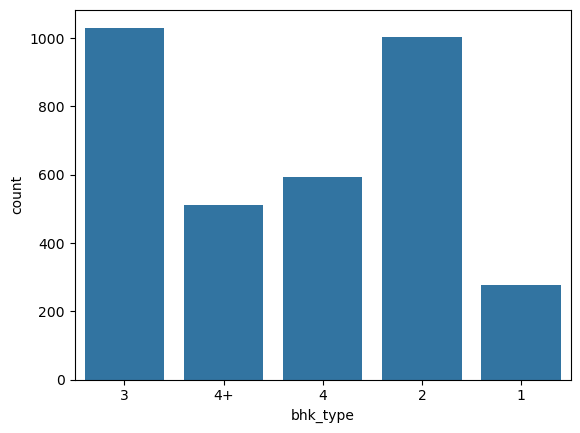

In [23]:
print(df['bhk_type'].value_counts())
ax=sns.countplot(x='bhk_type',data=df)
plt.show()

Houses & Villas    3414
Name: property_type, dtype: int64


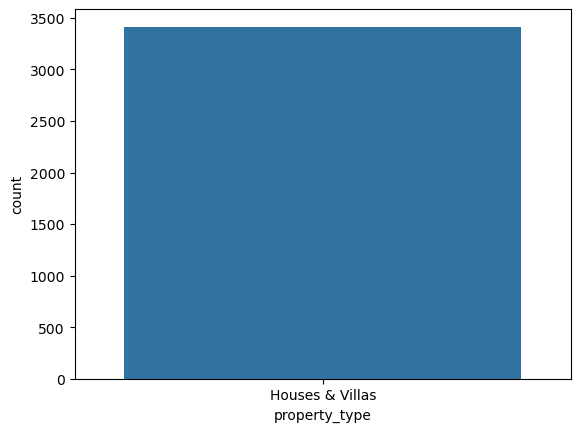

In [24]:
print(df['property_type'].value_counts())
ax=sns.countplot(x='property_type',data=df)
plt.show()

2     944
3     922
4     508
4+    479
1     261
Name: beds, dtype: int64


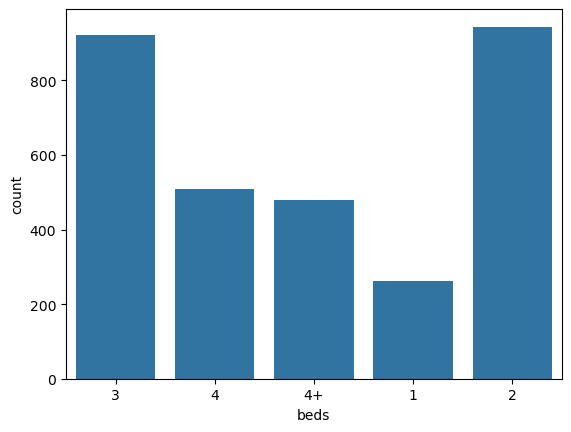

In [25]:
print(df['beds'].value_counts())
ax=sns.countplot(x='beds',data=df)
plt.show()

2     1252
3      811
1      584
4      424
4+     304
Name: baths, dtype: int64


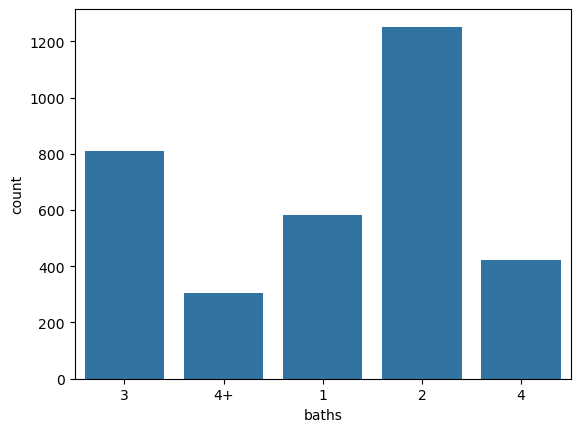

In [26]:
print(df['baths'].value_counts())
ax=sns.countplot(x='baths',data=df)
plt.show()

Kazhakoottam, Thiruvananthapuram, Kerala                57
Uday Vihar, Dehradun, Uttaranchal                       52
Kargi, Dehradun, Uttaranchal                            42
Sunny Enclave, Kharar, Punjab                           39
Kalia Colony, Jalandhar, Punjab                         38
                                                        ..
Ravidas Nagar, Jalandhar, Punjab                         1
Asals Sushant City, Panipat, Haryana                     1
Sarjapur Attibele Road, Bengaluru, Karnataka             1
Mahewa Patti Purab Uparhar, Allahabad, Uttar Pradesh     1
Bhel, Haridwar, Uttaranchal                              1
Name: address, Length: 2111, dtype: int64


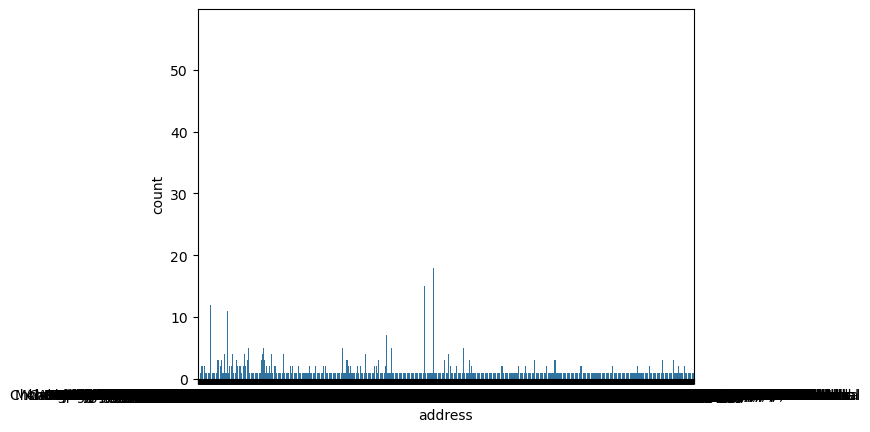

In [27]:
print(df['address'].value_counts())
ax=sns.countplot(x='address',data=df)
plt.show()

Dehradun              281
Bengaluru             212
Lucknow               154
Thiruvananthapuram    138
Kharar                 92
                     ... 
Mansa                   1
Shikarpur               1
Bakshi Ka Talab         1
Talipady                1
Nagla                   1
Name: city, Length: 456, dtype: int64


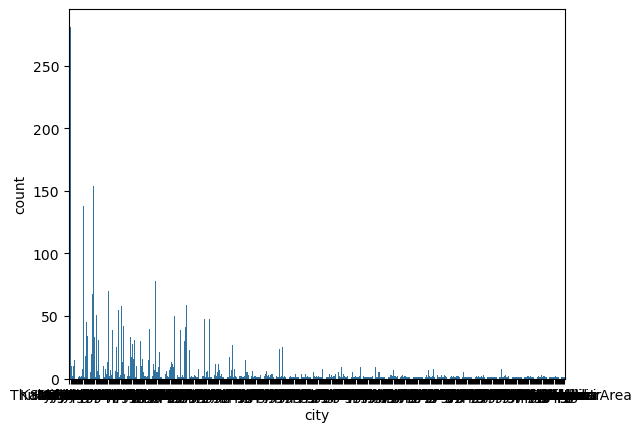

In [28]:
print(df['city'].value_counts())
ax=sns.countplot(x='city',data=df)
plt.show()

Haryana            524
Karnataka          514
Uttar Pradesh      501
Uttaranchal        490
Maharashtra        489
Punjab             470
Kerala             234
Gujarat             56
Tamil Nadu          25
Rajasthan           21
Madhya Pradesh      20
India               18
Telangana           14
Chhattisgarh        12
Andhra Pradesh       7
Delhi                5
West Bengal          3
Jammu & Kashmir      3
Odisha               2
Jharkhand            2
Bihar                1
Meghalaya            1
Chandigarh           1
Goa                  1
Name: state_code, dtype: int64


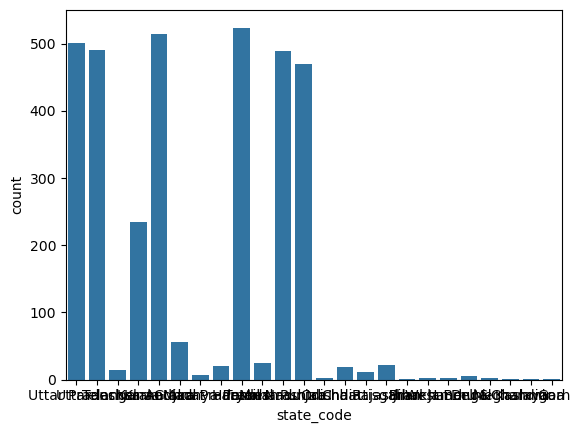

In [29]:
print(df['state_code'].value_counts())
ax=sns.countplot(x='state_code',data=df)
plt.show()

India    3421
Name: country, dtype: int64


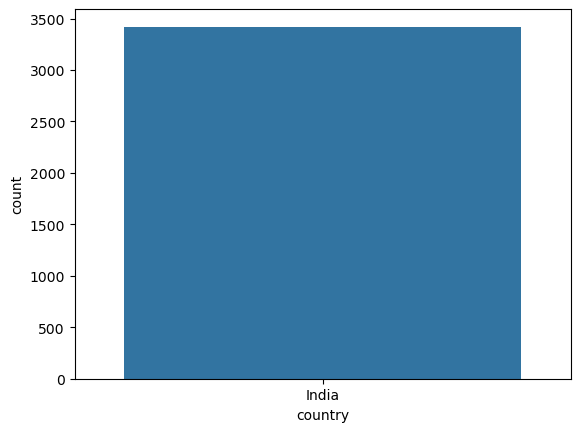

In [30]:
print(df['country'].value_counts())
ax=sns.countplot(x='country',data=df)
plt.show()

1000.0    145
900.0     144
1200.0    128
600.0     115
800.0      99
         ... 
108.0       1
1815.0      1
837.0       1
646.0       1
549.0       1
Name: carpetarea, Length: 651, dtype: int64


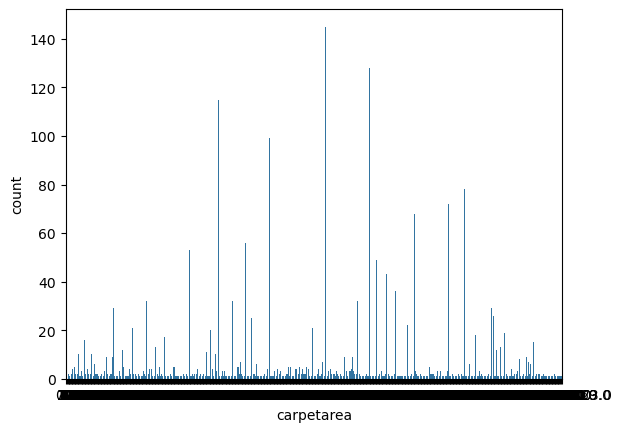

In [31]:
print(df['carpetarea'].value_counts())
ax=sns.countplot(x='carpetarea',data=df)
plt.show()

Ready to Move         2723
New Launch             385
Under Construction     273
Name: status, dtype: int64


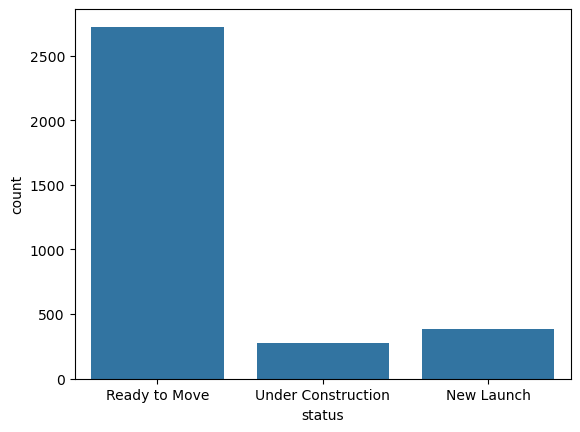

In [32]:
print(df['status'].value_counts())
ax=sns.countplot(x='status',data=df)
plt.show()

2.0          1350
1.0          1063
3.0           312
0.0           182
4.0            52
5.0            13
6.0             8
75.0            2
15.0            2
8.0             2
100.0           2
10.0            2
3600.0          1
1125.0          1
1500.0          1
300.0           1
7.0             1
50.0            1
3500.0          1
1412.0          1
1350.0          1
858.0           1
152.0           1
2350000.0       1
14.0            1
160.0           1
Name: floor, dtype: int64


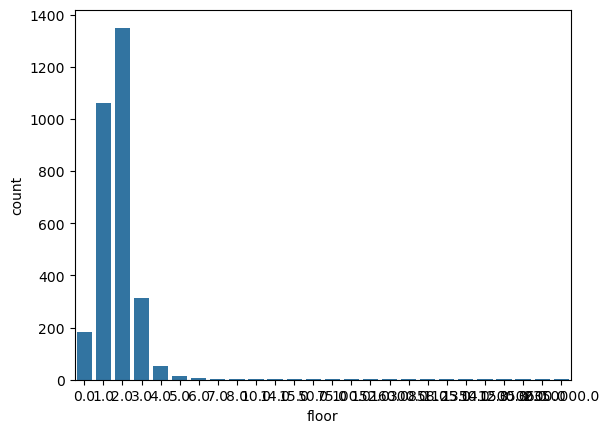

In [33]:
print(df['floor'].value_counts())
ax=sns.countplot(x='floor',data=df)
plt.show()

inf         91
5000.0      58
4000.0      38
10000.0     28
6000.0      22
            ..
170370.0     1
51.0         1
7308.0       1
11806.0      1
8414.0       1
Name: price_per_sqft, Length: 1725, dtype: int64


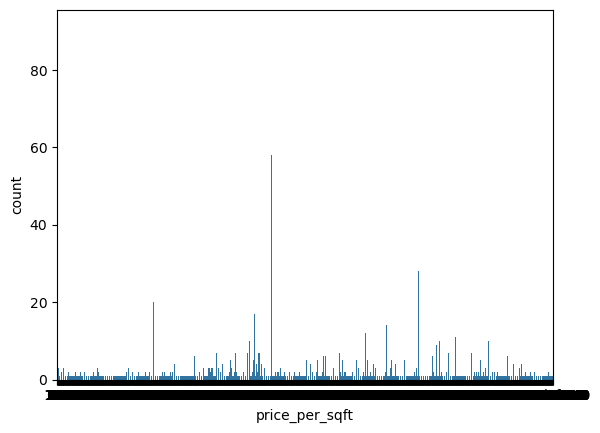

In [34]:
print(df['price_per_sqft'].value_counts())
ax=sns.countplot(x='price_per_sqft',data=df)
plt.show()

Semi-Furnished    1516
Unfurnished        953
Furnished          901
Name: furnished_status, dtype: int64


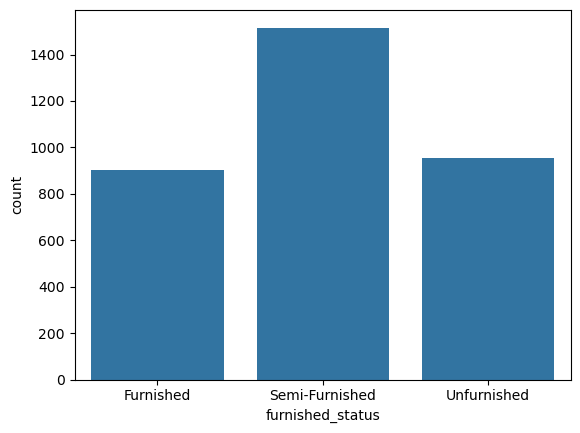

In [35]:
print(df['furnished_status'].value_counts())
ax=sns.countplot(x='furnished_status',data=df)
plt.show()

East          1220
West           466
North          445
North-East     387
South          168
North-West     111
South-East     107
South-West      73
Name: facing, dtype: int64


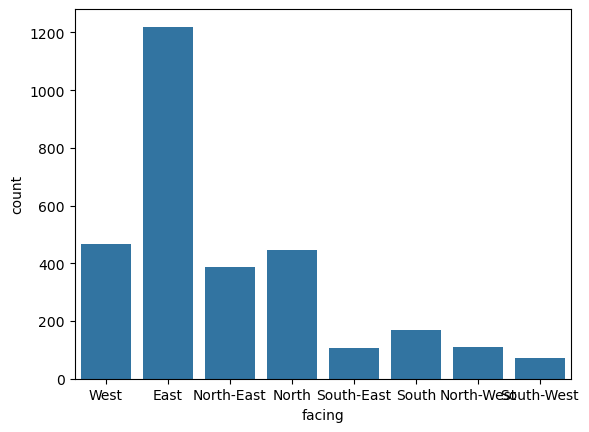

In [36]:
print(df['facing'].value_counts())
ax=sns.countplot(x='facing',data=df)
plt.show()

1     1580
0      615
2      546
3+     133
3      100
Name: car_parking, dtype: int64


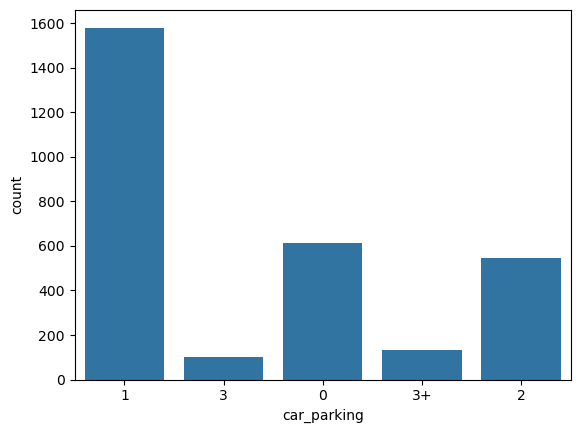

In [37]:
print(df['car_parking'].value_counts())
ax=sns.countplot(x='car_parking',data=df)
plt.show()

4500000.0     103
7500000.0      97
5500000.0      94
3500000.0      90
6000000.0      82
             ... 
35100000.0      1
1675000.0       1
3330000.0       1
3675000.0       1
60000.0         1
Name: buy_total_price, Length: 537, dtype: int64


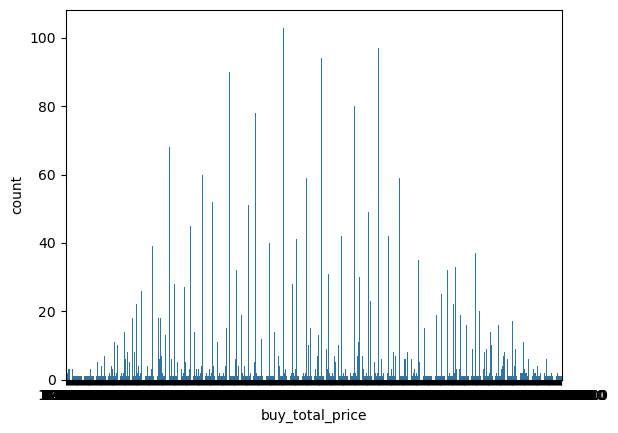

In [38]:
print(df['buy_total_price'].value_counts())
ax=sns.countplot(x='buy_total_price',data=df)
plt.show()

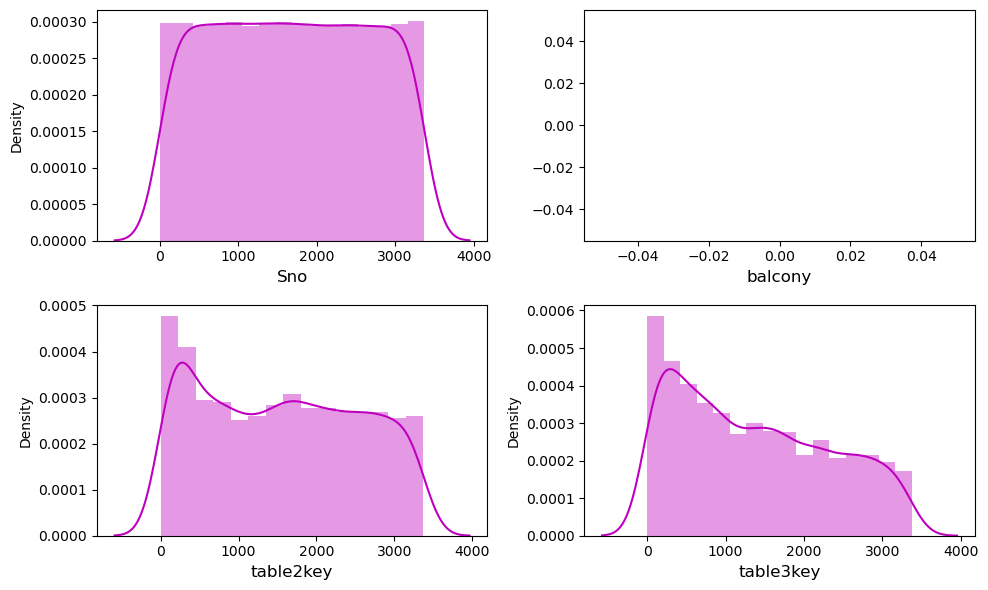

In [39]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()    

### BIVARIATE ANALYSIS

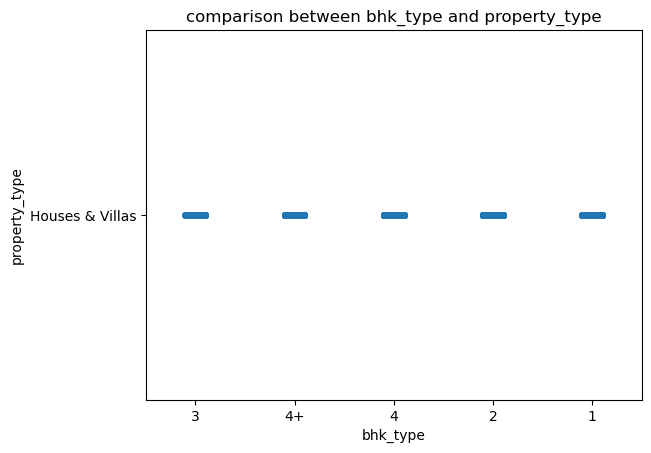

In [41]:
plt.title("comparison between bhk_type and property_type")
sns.stripplot(x="bhk_type",y="property_type",data=df)
plt.show()

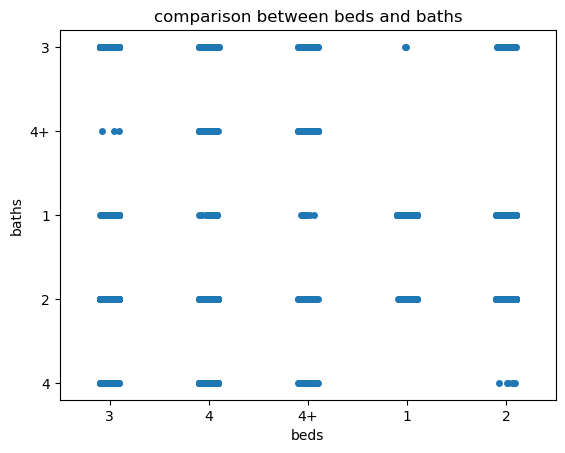

In [42]:
plt.title("comparison between beds and baths")
sns.stripplot(x="beds",y="baths",data=df)
plt.show()

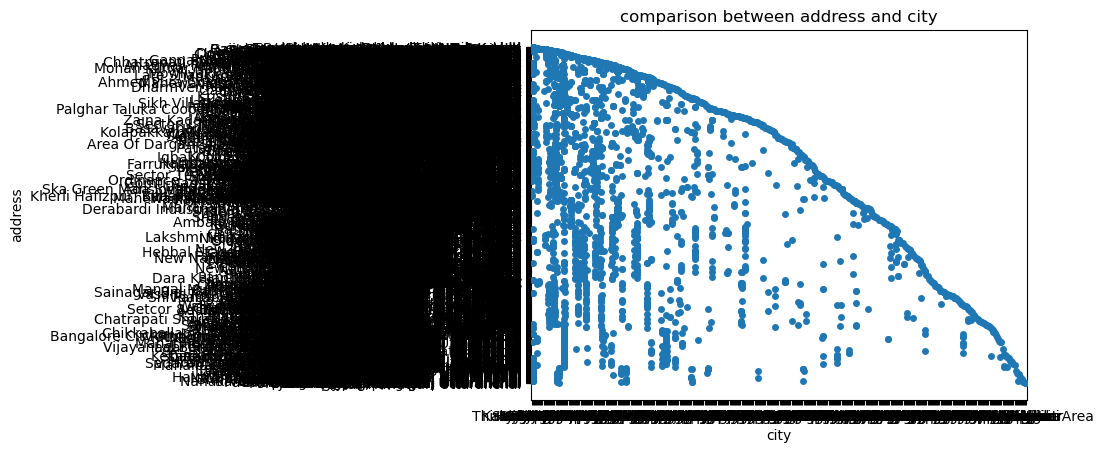

In [43]:
plt.title("comparison between address and city")
sns.stripplot(x="city",y="address",data=df)
plt.show()

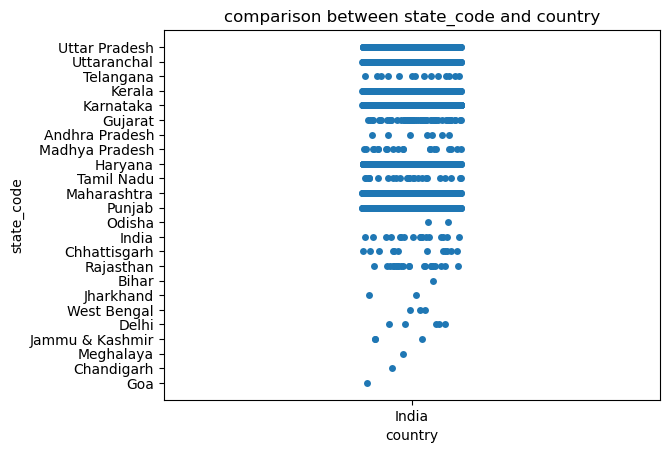

In [44]:
plt.title("comparison between state_code and country")
sns.stripplot(x="country",y="state_code",data=df)
plt.show()

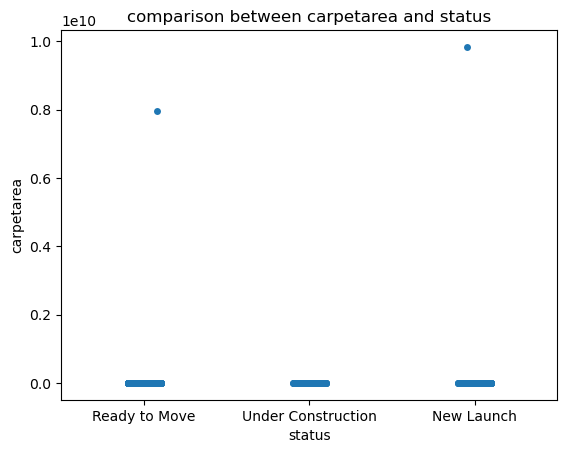

In [45]:
plt.title("comparison between carpetarea and status")
sns.stripplot(x="status",y="carpetarea",data=df)
plt.show()

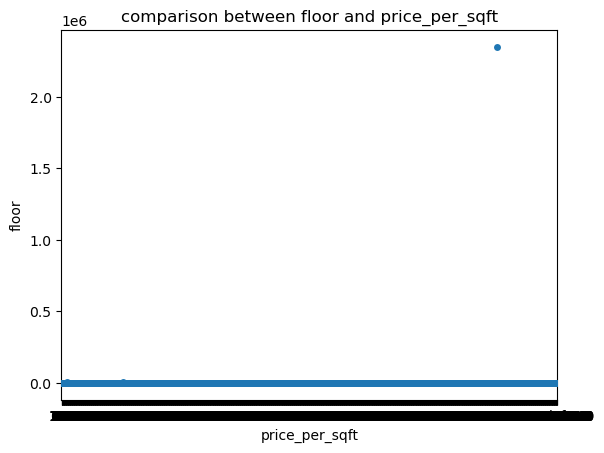

In [47]:
plt.title("comparison between floor and price_per_sqft")
sns.stripplot(x="price_per_sqft",y="floor",data=df)
plt.show()

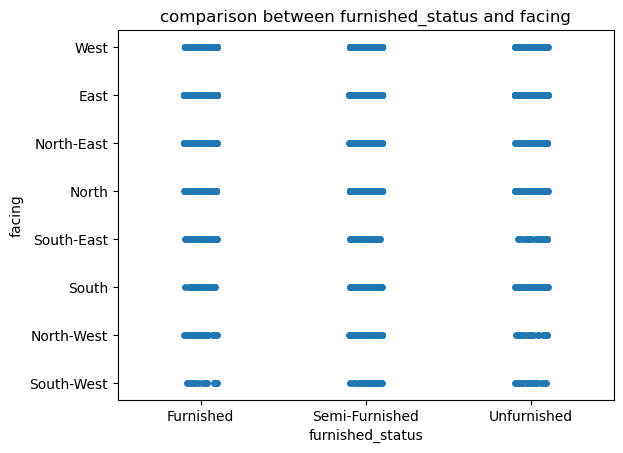

In [48]:
plt.title("comparison between furnished_status and facing")
sns.stripplot(x="furnished_status",y="facing",data=df)
plt.show()

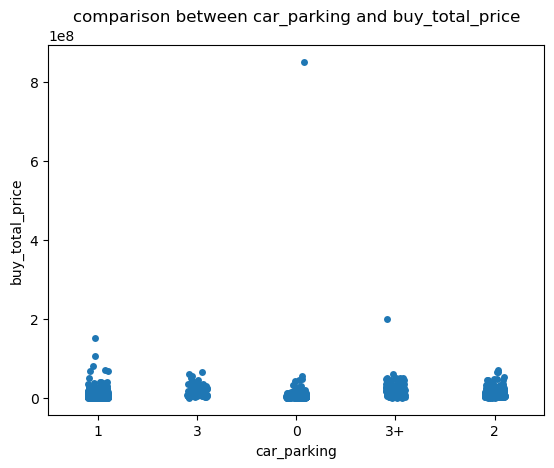

In [49]:
plt.title("comparison between car_parking and buy_total_price")
sns.stripplot(x="car_parking",y="buy_total_price",data=df)
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
col=['property_type','address', 'city','state_code', 'country', 'status', 'furnished_status', 'facing']
for c in col:
  df[c]=le.fit_transform(df[c])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3414 entries, 0 to 3420
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bhk_type          3414 non-null   float64
 1   property_type     3414 non-null   int32  
 2   beds              3414 non-null   float64
 3   baths             3414 non-null   float64
 4   address           3414 non-null   int32  
 5   city              3414 non-null   int32  
 6   state_code        3414 non-null   int32  
 7   country           3414 non-null   int32  
 8   carpetarea        3414 non-null   float64
 9   status            3414 non-null   int32  
 10  floor             3414 non-null   float64
 11  price_per_sqft    3414 non-null   float64
 12  furnished_status  3414 non-null   int32  
 13  facing            3414 non-null   int32  
 14  car_parking       3414 non-null   int64  
 15  buy_total_price   3414 non-null   float64
dtypes: float64(7), int32(8), int64(1)
memory usage:

In [40]:
df

,bhk_type,property_type,beds,baths,address,city,state_code,country,carpetarea,status,floor,price_per_sqft,furnished_status,facing,car_parking,buy_total_price
0,3.0,0,4.0,3.0,397,437,21,0,850.0,1,2.0,8824.0,0,7,1,7500000.0
1,3.0,0,3.0,3.0,397,437,21,0,850.0,1,2.0,8824.0,0,7,1,7500000.0
2,3.0,0,3.0,3.0,907,102,22,0,1150.0,1,2.0,6522.0,0,7,1,7500000.0
3,3.0,0,3.0,3.0,907,102,22,0,1050.0,1,2.0,7143.0,0,7,1,7500000.0
4,3.0,0,3.0,3.0,188,102,22,0,1050.0,1,2.0,7143.0,0,7,1,7500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,4.0,0,4.0,4.0,285,162,22,0,2600.0,1,2.0,1885.0,2,1,1,4900000.0
3417,4.0,0,4.0,4.0,971,102,22,0,900.0,1,3.0,11667.0,1,3,0,10500000.0
3418,2.0,0,2.0,2.0,188,102,22,0,612.0,1,1.0,6863.0,2,6,0,4200000.0
3419,3.0,0,3.0,2.0,1979,102,22,0,927.0,1,1.0,8414.0,0,0,2,7800000.0


In [51]:
df = df.round(2)

In [52]:
df.columns

Index(['Sno', 'bhk_type', 'property_type', 'beds', 'baths', 'balcony',
       'address', 'city', 'state_code', 'country', 'landmark', 'table2key',
       'table3key', 'Sno_', 'carpetarea', 'status', 'floor',
       'transaction_type', 'year_built', 'price_per_sqft', 'S_no',
       'furnished_status', 'facing', 'car_parking', 'type_of_ownership',
       'booking_amount', 'buy_total_price'],
      dtype='object')

In [53]:
X=df[['bhk_type', 'beds', 'baths', 'address', 'city',
       'state_code', 'country', 'status', 'floor',
       'price_per_sqft', 'furnished_status', 'facing', 'car_parking']].values

In [54]:
X

array([['3', nan, '3', ..., 'Furnished', 'West', '1'],
       ['3', '3', '3', ..., 'Furnished', 'West', '1'],
       ['3', '3', '3', ..., 'Furnished', 'West', '1'],
       ...,
       ['2', '2', '2', ..., 'Unfurnished', 'South-West', '0'],
       ['3', '3', '2', ..., 'Furnished', 'East', '2'],
       ['2', '2', '1', ..., 'Furnished', 'North-East', '1']], dtype=object)

## Buy total price

In [55]:
Y=df['buy_total_price'].values


In [56]:
Y

array([7500000., 7500000., 7500000., ..., 4200000., 7800000., 1950000.])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=4)

In [60]:
X_train

array([[nan, nan, nan, ..., nan, nan, nan],
       ['2', nan, '2', ..., 'Semi-Furnished', 'East', '1'],
       ['1', '1', '1', ..., 'Furnished', nan, '1'],
       ...,
       ['2', '2', '3', ..., 'Unfurnished', 'North-East', '1'],
       ['3', '3', '2', ..., 'Semi-Furnished', 'East', '0'],
       ['2', '2', '2', ..., 'Semi-Furnished', 'East', '0']], dtype=object)

In [61]:
X_train.shape

(2736, 13)

In [62]:
X_test.shape

(685, 13)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
mc=MinMaxScaler()

In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

data = {
    'country': ['India', 'USA', 'India', 'USA'],
    'age': [25, 30, 35, 40],
    'salary': [50000, 60000, 55000, 65000]
}

df = pd.DataFrame(data)
X_train = df.copy()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'salary']),
        ('cat', OneHotEncoder(), ['country'])
    ])

X_train_transformed = preprocessor.fit_transform(X_train)

columns_num = ['age_scaled', 'salary_scaled']
columns_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(['country'])
columns_all = list(columns_num) + list(columns_cat)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=columns_all)
print(X_train_transformed_df)


   age_scaled  salary_scaled  country_India  country_USA
0    0.000000       0.000000            1.0          0.0
1    0.333333       0.666667            0.0          1.0
2    0.666667       0.333333            1.0          0.0
3    1.000000       1.000000            0.0          1.0


In [70]:
X_train

,country,age,salary
0,India,25,50000
1,USA,30,60000
2,India,35,55000
3,USA,40,65000


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
reg=LinearRegression()

In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = {
    'country': ['India', 'USA', 'India', 'USA'],
    'age': [25, 30, 35, 40],
    'salary': [50000, 60000, 55000, 65000],
    'target': [200000, 300000, 250000, 350000]  # Assume this is the target variable
}

df = pd.DataFrame(data)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'salary']),
        ('cat', OneHotEncoder(), ['country'])
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])


In [78]:
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

print(predictions)

[300000.]


In [129]:
Y_pred=reg.predict(X_test)

In [130]:
from sklearn import metrics

In [131]:
metrics.mean_squared_error(Y_test,Y_pred)

33624362564.56576

In [132]:
np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

183369.47009948455

In [133]:
metrics.r2_score(Y_test,Y_pred)

-0.47955673048378045

## carpetarea

In [135]:
z=df['carpetarea'].values
z

array([ 850.,  850., 1150., ...,  612.,  927.,  500.])

In [138]:
Xx_train, Xx_test, z_train, z_test=train_test_split(X,z,test_size=0.2, random_state=4)

In [139]:
Xx_train

array([[2., 2., 1., ..., 1., 4., 1.],
       [3., 3., 2., ..., 1., 6., 1.],
       [2., 2., 1., ..., 2., 0., 0.],
       ...,
       [4., 4., 4., ..., 1., 0., 1.],
       [3., 3., 2., ..., 1., 0., 0.],
       [4., 4., 4., ..., 1., 0., 1.]])

In [140]:
Xx_train=mc.fit_transform(Xx_train)

In [141]:
Xx_test=sc.fit_transform(Xx_test)

In [142]:
reg.fit(Xx_train, z_train)

LinearRegression()

In [143]:
reg.coef_

array([-9.27020905e+02, -1.82760795e+03,  2.60858362e+03, -1.10540029e+03,
        2.27416904e+03, -6.79741774e+02,  4.54747351e-12, -4.85932325e+02,
       -1.37527900e+03, -3.10686969e+03, -1.36014860e+03, -6.48832203e+02,
       -1.60653178e+03])

In [144]:
reg.intercept_

3843.37066793976

In [145]:
z_pred=reg.predict(Xx_test)

In [146]:
metrics.mean_squared_error(z_test,z_pred)

2953009934.9020634

In [147]:
np.sqrt(metrics.mean_squared_error(z_test,z_pred))

54341.604088415195

In [148]:
metrics.r2_score(z_test,z_pred)

-0.003406551102373756

## property type

In [150]:
v=df['carpetarea'].values
v

array([ 850.,  850., 1150., ...,  612.,  927.,  500.])

In [151]:
X_x_train, X_x_test, v_train, v_test=train_test_split(X,v,test_size=0.2, random_state=4)

In [152]:
X_x_train=mc.fit_transform(X_x_train)

In [153]:
X_x_test=sc.fit_transform(X_x_test)

In [154]:
reg.fit(X_x_train, v_train)

LinearRegression()

In [155]:
reg.coef_

array([-9.27020905e+02, -1.82760795e+03,  2.60858362e+03, -1.10540029e+03,
        2.27416904e+03, -6.79741774e+02,  4.54747351e-12, -4.85932325e+02,
       -1.37527900e+03, -3.10686969e+03, -1.36014860e+03, -6.48832203e+02,
       -1.60653178e+03])

In [156]:
reg.intercept_

3843.37066793976

In [158]:
v_pred=reg.predict(X_x_test)

In [159]:
metrics.mean_squared_error(v_test,v_pred)


2953009934.9020634

In [160]:
np.sqrt(metrics.mean_squared_error(v_test,v_pred))

54341.604088415195

In [161]:
metrics.r2_score(v_test,v_pred)

-0.003406551102373756

### MODEL TRAINING

### LOGISTIC REGRESSION

In [82]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [83]:
data = {
    'country': ['India', 'USA', 'India', 'USA'],
    'age': [25, 30, 35, 40],
    'salary': [50000, 60000, 55000, 65000],
    'target': [1, 0, 1, 0]  
}

df = pd.DataFrame(data)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['country'])
    ], remainder='passthrough')

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [85]:
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)

y_pred = logreg.predict(X_test_encoded)

print(y_pred)


[1]


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



### Evaluation metrics

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [91]:
X_test_encoded = pd.get_dummies(X_test)

missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)

for col in missing_cols:
    X_test_encoded[col] = 0

X_test_encoded = X_test_encoded[X_train_encoded.columns]

y_prob = logreg.predict_proba(X_test_encoded)[:, 1]



### ROC Curve

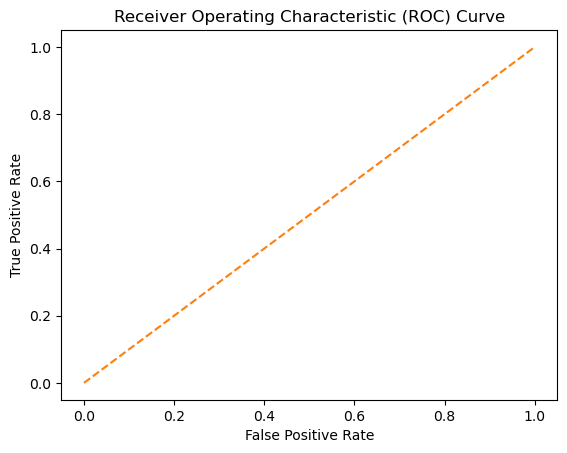

In [92]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve

label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


### Decision Tree Classifier

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


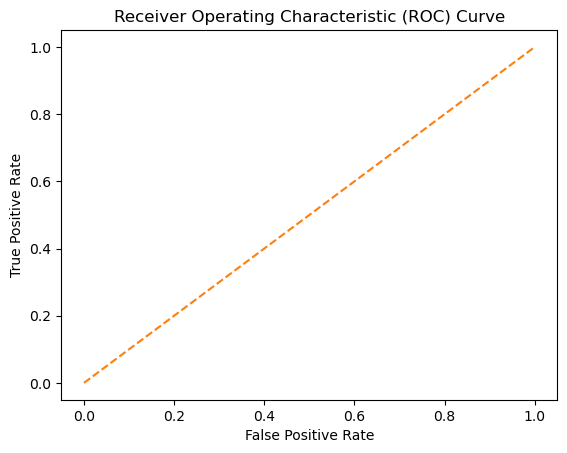

In [96]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve

label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


### k-Nearest neighbors

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'salary']), 
        ('cat', OneHotEncoder(), ['country'])       
    ])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

n_neighbors = min(3, len(X_train_encoded))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train_encoded, y_train)

y_pred = knn.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.0
